# Chess Winner Prediction ♟🐴🐘👑

<img src="Magnus.jpg" width=100% />


## Motvation
<a href= 'https://www.thefamouspeople.com/profiles/magnus-carlsen-6949.php' target = '__blank' ><strong> Magnus Carlsen  </strong></a>is a Norwegian chess player who faced world chess champion Viswanathan Anand (India) and won the World Chess Championship in 2013 , becoming the second youngest world chess champion at age 22. 

# Goal 🎯

<strong> The goal is to predict the winner of chess match using chess game statistics </strong>

# About Chess


*  It is a board game of strategic skill for two players, played on a checkered board.
*  Each player begins the game with sixteen pieces that are moved and used to capture opposing pieces according to precise rules.
*  The object is to put the opponent's king under a direct attack from which escape is impossible (checkmate).
*  For more info <a href='https://www.britannica.com/topic/chess' target = '__blank'>Click here</a>

# Libraries 

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from ipywidgets import interact

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
data = pd.read_csv("data/games.csv")
print(data.shape)
data.tail()

(20058, 16)


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3


## About Data

*  We have 20000 rows and 16 columns in the dataset



### Data fields

* Game ID - Which must be same for black and white player
* Rated (T/F) - If the player is rated or not
* Start Time - Time at which game started
* End Time - Time at which game ended
* Number of Turns - Number of moves (white plays first)
* Game Status - Checkmate or resign or outoftime
* Winner - Black / white / draw
* Time Increment - each move increments time on clock
* White Player ID
* White Player Rating
* Black Player ID
* Black Player Rating
* All Moves in Standard Chess Notation
* Opening Eco (Standardised Code for any given opening, <a href='https://www.365chess.com/eco.php' target = '__blank'>list here</a>)

* Opening Name
* Opening Ply (Number of moves in the opening phase)

In [3]:
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [5]:
data.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [6]:
data.nunique()

id                19113
rated                 2
created_at        13151
last_move_at      13186
turns               211
victory_status        4
winner                3
increment_code      400
white_id           9438
white_rating       1516
black_id           9331
black_rating       1521
moves             18920
opening_eco         365
opening_name       1477
opening_ply          23
dtype: int64

In [7]:
data['winner'].unique()

array(['white', 'black', 'draw'], dtype=object)

In [8]:
data['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [9]:
data['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [10]:
data.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [11]:
print('Shape before deleting duplicate values:', data.shape)

# Removing duplicate rows if any

data.drop_duplicates(inplace=True)
print('Shape After deleting duplicate values:', data.shape)

Shape before deleting duplicate values: (20058, 16)
Shape After deleting duplicate values: (19629, 16)


# EDA

## <span style="color:red">Who wins more ?</span>

In [12]:
data['winner'].value_counts()

white    9792
black    8919
draw      918
Name: winner, dtype: int64

In [13]:
data['winner'].value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

white    49.89 %
black    45.44 %
draw      4.68 %
Name: winner, dtype: object

#### <span style="color:green">The first-move advantage in chess is the inherent advantage of the player (White) who makes the first move in chess. <br> <br>Chess players and theorists generally agree that White begins the game with some advantage.</span>

## <span style="color:red">Which openings have the most wins?</span>

A chess opening or simply an opening refers to the initial moves of a chess game.
<br>The term can refer to the initial moves by either side, White or Black,<br>
but an opening by Black may also be known as a defense. 
<br>There are dozens of different openings, and hundreds of variants." 
(Source: <a href= 'https://en.wikipedia.org/wiki/Chess_opening' target ='__blank'>Chess Openings )</a>

In [14]:
data['opening_name'].nunique()

1477

There are 1477 unique opening in the dataset

In [15]:
open_data = data.groupby(by='opening_name')['winner'].value_counts()
open_data = open_data.reset_index(name='wins')
open_data = open_data.sort_values(by='wins', ascending=False)
open_data.head(10)

,opening_name,winner,wins
2647,Van't Kruijs Opening,black,224
2189,Sicilian Defense,black,191
2220,Sicilian Defense: Bowdler Attack,black,162
2095,Scandinavian Defense: Mieses-Kotroc Variation,white,159
2190,Sicilian Defense,white,147
2113,Scotch Game,white,141
653,French Defense: Knight Variation,white,133
2648,Van't Kruijs Opening,white,123
2064,Scandinavian Defense,black,122
1451,Philidor Defense #3,white,120


In [16]:

black_wins = open_data[open_data['winner'] == 'black']
white_wins = open_data[open_data['winner'] == 'white']
black_wins

,opening_name,winner,wins
2647,Van't Kruijs Opening,black,224
2189,Sicilian Defense,black,191
2220,Sicilian Defense: Bowdler Attack,black,162
2064,Scandinavian Defense,black,122
654,French Defense: Knight Variation,black,118
...,...,...,...
1816,Queen's Pawn Game: Veresov Attack | Dutch System,black,1
353,Dutch Defense: Leningrad Variation | Matulovi...,black,1
1808,Queen's Pawn Game: Torre Attack | Gruenfeld V...,black,1
167,Blackmar-Diemer Gambit: Vienna Variation,black,1


### We can combine all those top openings and create a single dataframe

In [17]:

black_winner = list(black_wins.head(10).opening_name)
white_winner = list(white_wins.head(10).opening_name)
winner = set(black_winner + white_winner)

print("Unique top openings played by chess players are: \n")
[print(value) for value in winner]

dataframes = []
for x in winner:
    temp = open_data[open_data['opening_name'] == x]
    temp['sum'] = temp.wins.sum().astype(int)
    temp['percentage'] = ( temp['wins'] / temp['sum'] ).mul(100).round(3)
    dataframes.append(temp)
    
# print(dataframes[0])

win_prob = dataframes[0]
for x in dataframes[1:]:
    win_prob = pd.concat([win_prob, x])
    
win_prob = win_prob.sort_values('percentage' , ascending=False)
win_prob = win_prob[win_prob['winner'] != 'draw']
win_prob

Unique top openings played by chess players are: 

Scandinavian Defense: Mieses-Kotroc Variation
Scotch Game
Philidor Defense #3
Indian Game
French Defense: Knight Variation
Sicilian Defense
Sicilian Defense: Bowdler Attack
Philidor Defense #2
Scandinavian Defense
Horwitz Defense
Van't Kruijs Opening
Queen's Pawn Game: Mason Attack
Queen's Pawn Game: Chigorin Variation


,opening_name,winner,wins,sum,percentage
1451,Philidor Defense #3,white,120,188,63.830
2095,Scandinavian Defense: Mieses-Kotroc Variation,white,159,253,62.846
2647,Van't Kruijs Opening,black,224,363,61.708
2220,Sicilian Defense: Bowdler Attack,black,162,294,55.102
821,Indian Game,black,99,180,55.000
2064,Scandinavian Defense,black,122,222,54.955
2189,Sicilian Defense,black,191,353,54.108
2113,Scotch Game,white,141,264,53.409
801,Horwitz Defense,white,110,208,52.885
1792,Queen's Pawn Game: Mason Attack,white,116,230,50.435


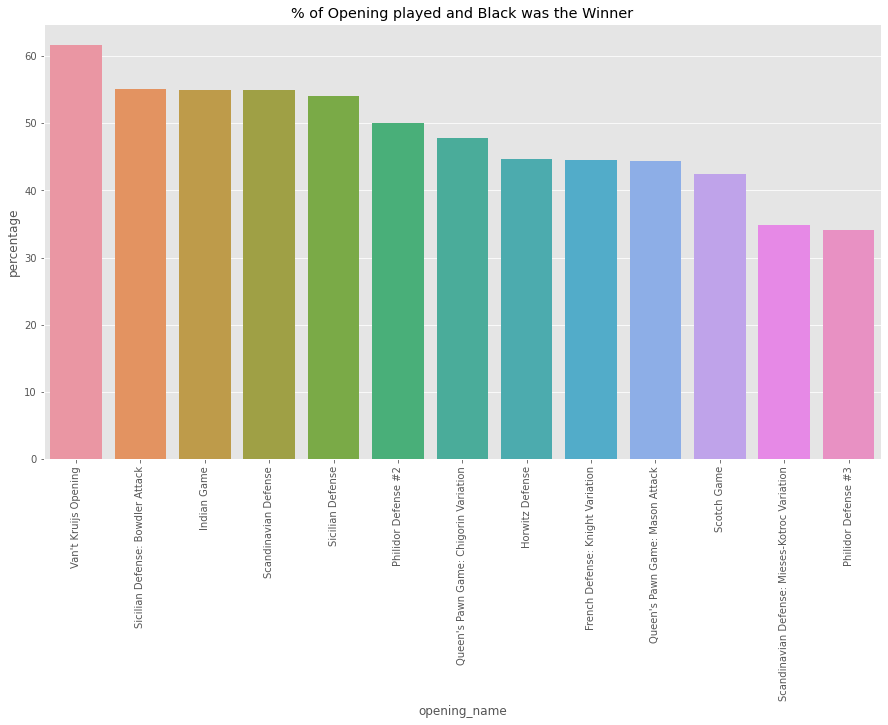

In [18]:
# px.bar(win_prob[win_prob['winner']== 'black'],x="opening_name" , y = "percentage" , title="% of Opening played and black was the Winner")


plt.figure(figsize=((15,8)))
sns.barplot(data=win_prob[win_prob['winner']== 'black'],x="opening_name" , y = "percentage" )
plt.title("% of Opening played and Black was the Winner")
plt.xticks(rotation = 90)
plt.show()

### Reverse graph values are expected for white

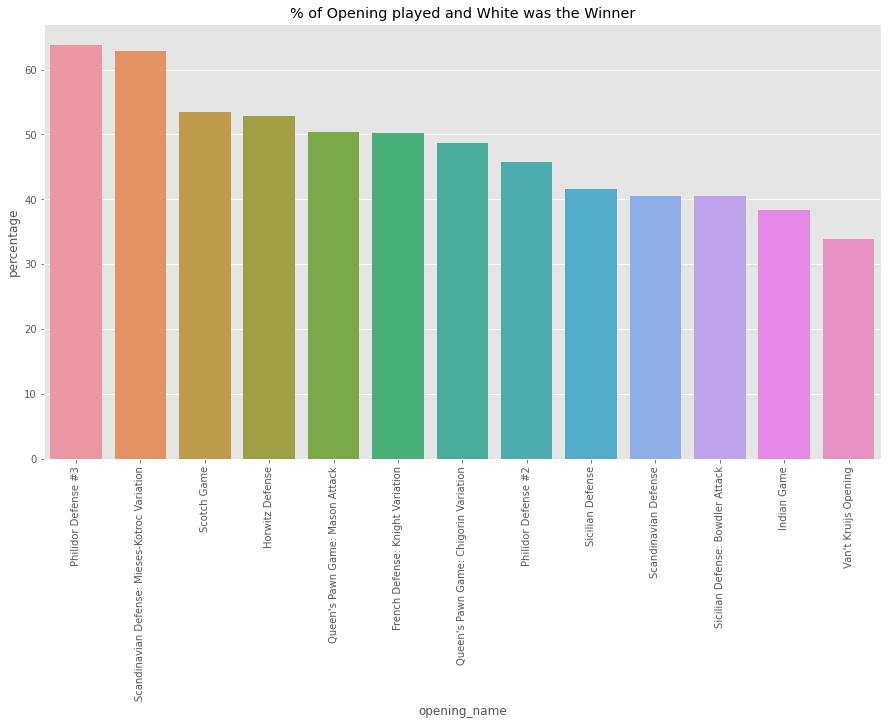

In [19]:
# px.bar(win_prob[win_prob['winner']== 'white'],x="opening_name" , y = "percentage" , title="% of Opening played and White was the Winner")

plt.figure(figsize=((15,8)))
sns.barplot(data=win_prob[win_prob['winner']== 'white'],x="opening_name" , y = "percentage" )
plt.title("% of Opening played and White was the Winner")
plt.xticks(rotation = 90)
plt.show()

## <span style="color:red">How many number of turns taken</span>

In [20]:
turns_data = pd.cut(data['turns'], 10, precision=0).value_counts().sort_index()
turns_data

(1.0, 36.0]       4569
(36.0, 71.0]      8777
(71.0, 105.0]     4205
(105.0, 140.0]    1610
(140.0, 175.0]     405
(175.0, 210.0]      51
(210.0, 245.0]       9
(245.0, 279.0]       2
(279.0, 314.0]       0
(314.0, 349.0]       1
Name: turns, dtype: int64

<AxesSubplot:>

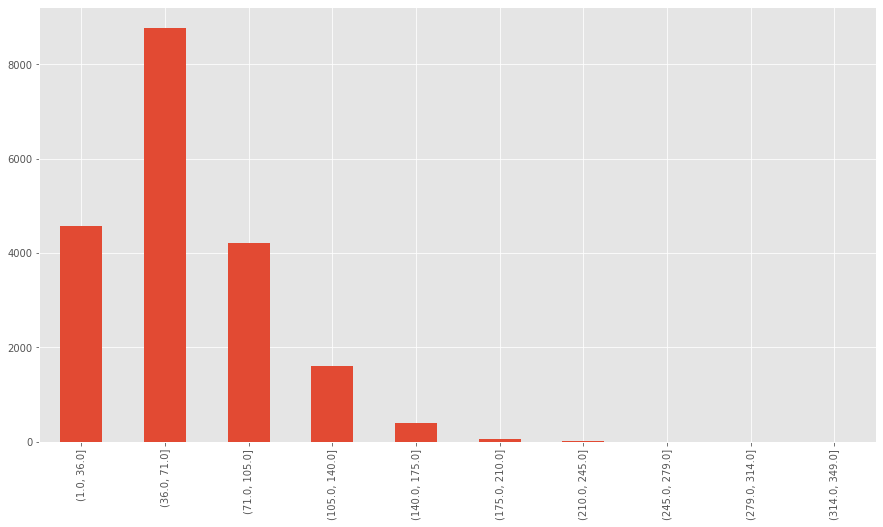

In [21]:
plt.figure(figsize=((15,8)))
turns_data.plot.bar()


### <span style= "color :green" >We can see that majority of games concluded in less than 71 moves and almost all the games have less than 175 moves.</span> 

## <span style="color:red">What victory status tells ?</span>

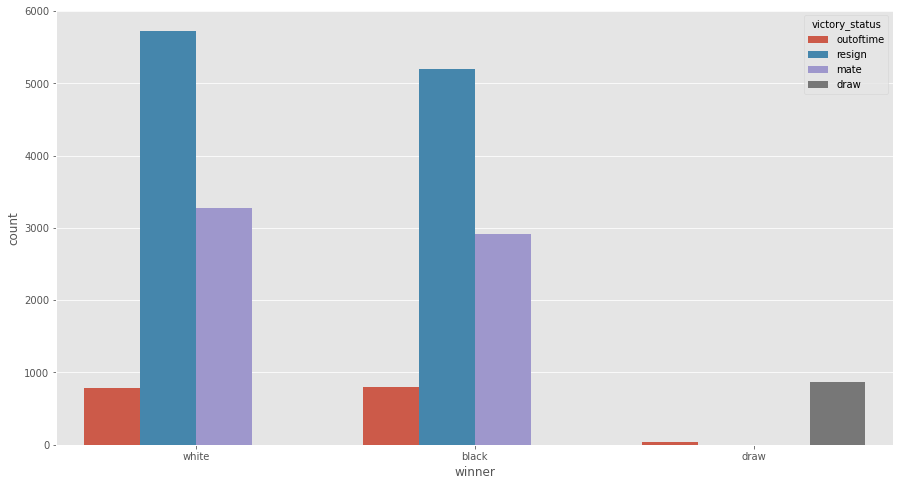

In [22]:
plt.figure(figsize=((15,8)))
sns.countplot( x = 'winner', hue = 'victory_status', data = data)
plt.show()

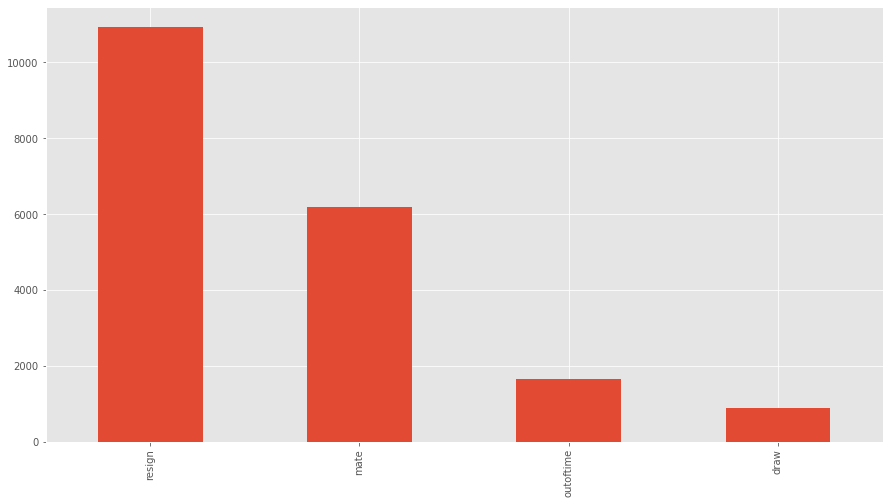

In [23]:
plt.figure(figsize=((15,8)))
vict_data = data.victory_status.value_counts()
vict_data.plot.bar()
plt.show()

### <span style = "color:green">Out of time ! This is interesting, because this brings our attention to one of the rare happenings in the game of Chess.</span>

<img src="Out of time.png" width=100% />

## <span style="color:red">What is rating ?</span>

### A chess rating system is a system used in chess to estimate the strength of a player, based on their performance versus other players.<br>
### for more information <a href="https://en.wikipedia.org/wiki/Chess_rating_system" target = "__blank"> click here </a>

<AxesSubplot:xlabel='black_rating', ylabel='Density'>

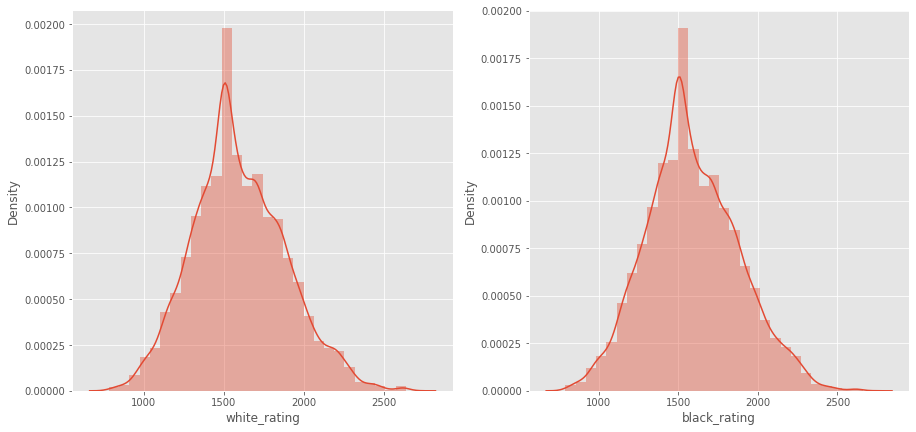

In [24]:
plt.figure(figsize=((15,7)))
plt.subplot(121)
#Distribution of white's rating
sns.distplot(data['white_rating'], bins = 30)
plt.subplot(122)
#Distribution of black's rating
sns.distplot(data['black_rating'], bins = 30)

In [25]:
data[['white_rating' , 'black_rating']].describe()

,white_rating,black_rating
count,19629.000000,19629.000000
mean,1596.090224,1588.324622
std,290.165038,290.164447
min,784.000000,789.000000
25%,1400.000000,1393.000000
50%,1567.000000,1562.000000
75%,1791.000000,1783.000000
max,2700.000000,2723.000000


### <span style= "color:green">From the above plot, it's evident that the distribution of rating for White and Black is pretty similar. <br><br>Hence there's no rating-bias in the overall dataset.</span>

In [26]:
#adding a new column which stores the rating difference between black and white

data["Rating_Diff"] = abs(data['white_rating'] - data['black_rating'])

<AxesSubplot:xlabel='Rating_Diff', ylabel='Density'>

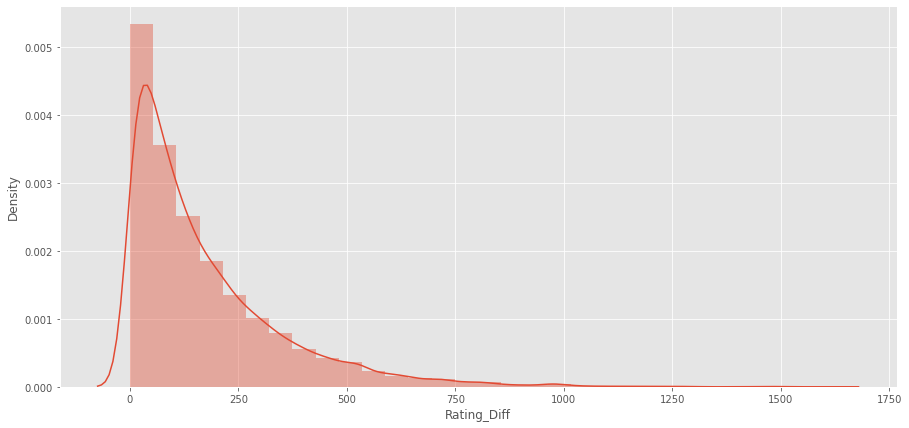

In [27]:
plt.figure(figsize=((15,7)))
sns.distplot(data["Rating_Diff"], bins = 30 )

### <span style= "color:green">From the above plot, it's evident that the difference in the rating for White and Black is not that huge. <br><br>Hence it is confirmed that there's no rating-bias in the overall dataset.</span>

In [28]:
print(data[data['winner'] == 'white']['white_rating'].mean().round())
print(data[data['winner'] == 'black']['white_rating'].mean().round())
print(data[data['winner'] == 'white']['black_rating'].mean().round())
print(data[data['winner'] == 'black']['black_rating'].mean().round())

print(data[data['winner'] == 'draw']['white_rating'].mean().round())
print(data[data['winner'] == 'draw']['black_rating'].mean().round())

1634.0
1549.0
1539.0
1638.0
1650.0
1640.0


## <span style="color:red">Who are TOP 20 Players ?</span>

In [29]:
topWhitePlayers = data['white_id'][data['winner'] == 'white'].value_counts()
topBlackPlayers = data['black_id'][data['winner'] == 'black'].value_counts()

In [30]:
topper = pd.DataFrame(topWhitePlayers.append(topBlackPlayers), columns = ['Matches_Won'])
topper.sort_values(by = ['Matches_Won'], ascending = False, inplace = True)

In [31]:
topper

,Matches_Won
ssf7,29
ducksandcats,29
hassan1365416,28
chesscarl,27
docboss,25
...,...
mrsuper,1
as1973,1
dibarro,1
ekimm,1


In [32]:
topper['player_id'] = topper.index
top_players_bywins = topper.groupby('player_id').sum().reset_index()
top_players_bywins.sort_values('Matches_Won', ascending=False, inplace = True)

In [33]:
top_players_bywins[:10]

,player_id,Matches_Won
1564,chesscarl,45
2314,ducksandcats,43
4289,king5891,42
2253,doraemon61,38
480,anakgreget,36
7354,smilsydov,36
7700,taranga,34
8173,unrim,33
4523,lance5500,33
2487,elvis1997,33


In [34]:
#This cell puts white id and black id under a common column and puts them into one dataframe
mask = ['white_id', 'white_rating']
white_player_df = data[mask]
white_player_df.columns = ['player_id', 'player_rating']

mask = ['black_id', 'black_rating']
black_player_df = data[mask]
black_player_df = black_player_df[mask]

black_player_df.columns = ['player_id', 'player_rating']
top_players_byrating = pd.concat([white_player_df, black_player_df])

In [35]:
top_players_byrating

,player_id,player_rating
0,bourgris,1500
1,a-00,1322
2,ischia,1496
3,daniamurashov,1439
4,nik221107,1523
...,...,...
20053,jamboger,1220
20054,farrukhasomiddinov,1196
20055,schaaksmurf3,1286
20056,jamboger,1227


In [36]:
top_players_byrating = top_players_byrating.groupby("player_id").mean().reset_index()

In [37]:
top_players_byrating

,player_id,player_rating
0,--jim--,986.00
1,-0olo0-,1860.00
2,-l-_jedi_knight_-l-,1473.75
3,-mati-,1252.00
4,-pavel-,1383.00
...,...,...
15630,zzeljko,1827.00
15631,zzhdan,1373.00
15632,zztopillo,1471.50
15633,zzzbbb,1616.00


In [38]:
Top = pd.merge(top_players_bywins, top_players_byrating,  how='left', left_on='player_id' ,right_on='player_id')

In [39]:
Top

,player_id,Matches_Won,player_rating
0,chesscarl,45,2222.782609
1,ducksandcats,43,1842.869565
2,king5891,42,1400.000000
3,doraemon61,38,2261.761905
4,anakgreget,36,1701.621622
...,...,...,...
8873,khalon,1,1764.000000
8874,khallahyari,1,1336.000000
8875,khalilk,1,1283.000000
8876,khaledalansary,1,1352.500000


Text(0, 0.5, 'Player ID')

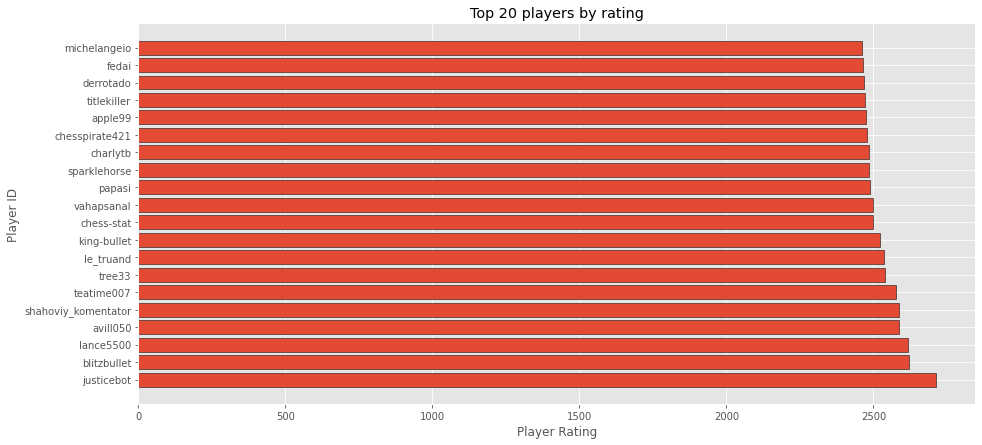

In [40]:
Top_20_rated = Top.sort_values(by='player_rating', ascending=False).head(20)
plt.figure(figsize=((15,7)))
plt.barh(y=Top_20_rated.player_id, width=Top_20_rated.player_rating, edgecolor='black')

plt.title('Top 20 players by rating')
plt.xlabel('Player Rating')
plt.ylabel('Player ID')

Text(0, 0.5, 'Player ID')

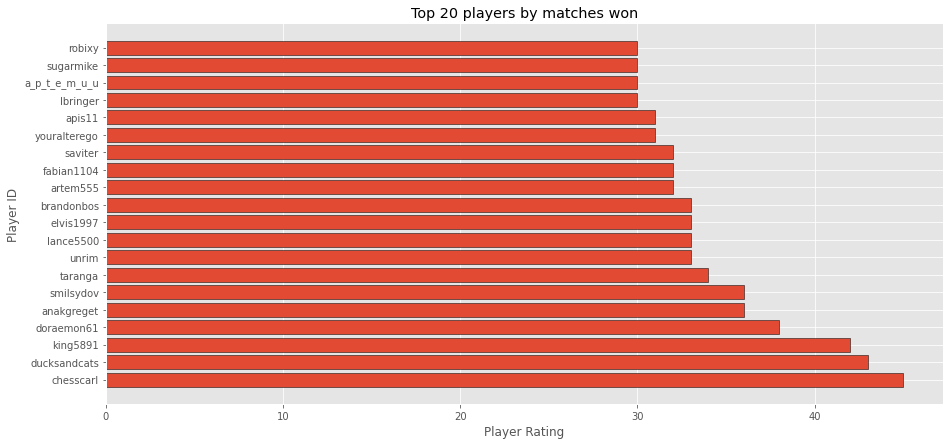

In [41]:
Top_20_wins = Top.sort_values(by='Matches_Won', ascending=False).head(20)
plt.figure(figsize=((15,7)))
plt.barh(y=Top_20_wins.player_id, width=Top_20_wins.Matches_Won, edgecolor='black')

plt.title('Top 20 players by matches won')
plt.xlabel('Player Rating')
plt.ylabel('Player ID')

## <span style="color:red">What about Time ?</span>

In [42]:
data['time_taken'] = data['last_move_at'] - data['created_at']

<AxesSubplot:xlabel='time_taken', ylabel='Density'>

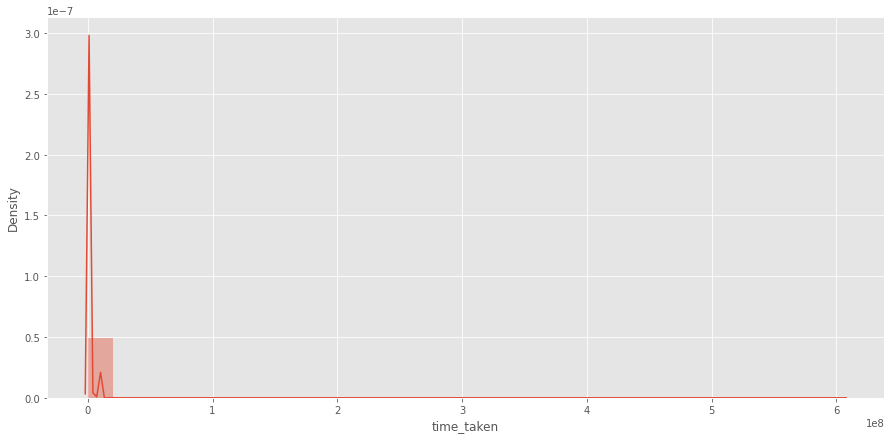

In [43]:
plt.figure(figsize=((15,7)))
sns.distplot(data["time_taken"], bins = 30 )

In [44]:
data[data['time_taken'] ==0].count() 

id                8533
rated             8533
created_at        8533
last_move_at      8533
turns             8533
victory_status    8533
winner            8533
increment_code    8533
white_id          8533
white_rating      8533
black_id          8533
black_rating      8533
moves             8533
opening_eco       8533
opening_name      8533
opening_ply       8533
Rating_Diff       8533
time_taken        8533
dtype: int64

In [45]:
data.shape

(19629, 18)

In [46]:
print(f"Nearly {round((8533/19629)*100,2)} % games took 0 time to complete which is weird !")

Nearly 43.47 % games took 0 time to complete which is weird !


### <span style= "color:green">Time provided is not reliable</span>

# Machine Learning

In [47]:
data.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
Rating_Diff       0
time_taken        0
dtype: int64

In [48]:
data.nunique()

id                19113
rated                 2
created_at        13151
last_move_at      13186
turns               211
victory_status        4
winner                3
increment_code      400
white_id           9438
white_rating       1516
black_id           9331
black_rating       1521
moves             18920
opening_eco         365
opening_name       1477
opening_ply          23
Rating_Diff         894
time_taken        10327
dtype: int64

Text(0, 0.5, 'Number of rows')

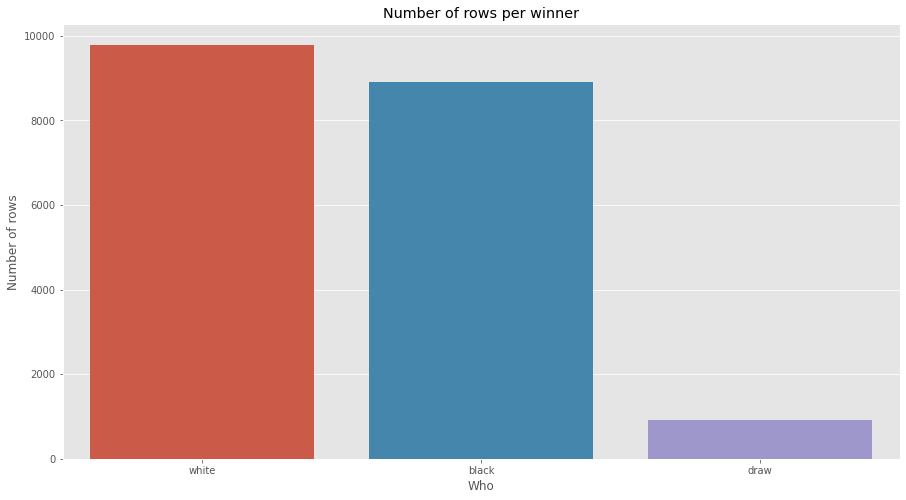

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(x='winner', data=data)
plt.title('Number of rows per winner')
plt.xlabel('Who')
plt.ylabel('Number of rows')

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from. and data is balanced.

In [119]:
cols = ['white_rating' , 'black_rating' , 'opening_eco' ,'opening_name', 'Rating_Diff' , 'winner']

dataForML = data[cols]
dataForML.head()


,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner
0,1500,1191,D10,Slav Defense: Exchange Variation,309,white
1,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,61,black
2,1496,1500,C20,King's Pawn Game: Leonardis Variation,4,white
3,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,15,white
4,1523,1469,C41,Philidor Defense,54,white


In [120]:
dataForML.nunique()

white_rating    1516
black_rating    1521
opening_eco      365
opening_name    1477
Rating_Diff      894
winner             3
dtype: int64

In [121]:
# Saving this final data for reference 
dataForML.to_pickle('dataForML.pkl')

### Obviously no one knows or remembers opening ECO and using it as a predictor is bit confusing and less informative. <br> So we will try to use opening names

In [122]:
dataForML.head(20)

,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner
0,1500,1191,D10,Slav Defense: Exchange Variation,309,white
1,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,61,black
2,1496,1500,C20,King's Pawn Game: Leonardis Variation,4,white
3,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,15,white
4,1523,1469,C41,Philidor Defense,54,white
5,1250,1002,B27,Sicilian Defense: Mongoose Variation,248,draw
6,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,97,white
7,1413,2108,B00,Nimzowitsch Defense: Kennedy Variation | Link...,695,black
8,1439,1392,C50,Italian Game: Schilling-Kostic Gambit,47,black
9,1381,1209,B01,Scandinavian Defense: Mieses-Kotroc Variation,172,white


we can see a special pipe character '|' in between opening names Let's check that out !

In [123]:
multi_openings = dataForML[dataForML['opening_name'].str.find('|') != -1]
multi_openings

,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner
7,1413,2108,B00,Nimzowitsch Defense: Kennedy Variation | Link...,695,black
11,1381,1867,C02,French Defense: Advance Variation | Paulsen A...,486,black
15,1141,1094,C57,Italian Game: Two Knights Defense | Knight At...,47,black
23,1307,1106,A25,English Opening: King's English Variation | R...,201,white
31,1200,1002,B52,Sicilian Defense: Canal Attack | Main Line,198,black
...,...,...,...,...,...,...
20034,1258,1620,A28,English Opening: King's English Variation | F...,362,draw
20036,1247,1436,A21,English Opening: King's English Variation | R...,189,white
20038,1247,1359,A21,English Opening: King's English Variation | K...,112,black
20039,1550,1250,C52,Italian Game: Evans Gambit | Main Line,300,white


In [124]:
3267/ 20000

0.16335

 16 % of total games are played with these openings

In [125]:
multi_openings['opening_name'].str.len().max()

91

In [126]:
multi_openings[multi_openings['opening_name'].str.len() == 91]

,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner
638,2373,2356,B33,Sicilian Defense: Lasker-Pelikan Variation | ...,17,black
2551,1730,1309,B00,Nimzowitsch Defense: Scandinavian Variation | ...,421,draw
11945,2401,2150,B33,Sicilian Defense: Lasker-Pelikan Variation | ...,251,black
11951,2216,2150,B33,Sicilian Defense: Lasker-Pelikan Variation | ...,66,black
15378,1861,1896,B33,Sicilian Defense: Lasker-Pelikan Variation | ...,35,white


In [127]:
multi_openings.loc[638 ,'opening_name']

'Sicilian Defense: Lasker-Pelikan Variation |  Sveshnikov Variation |  Chelyabinsk Variation'

In [128]:
multi_openings.loc[2551 ,'opening_name']

'Nimzowitsch Defense: Scandinavian Variation |  Bogoljubov Variation |  Heinola-Deppe Gambit'

These are special cases of main openings. <br> 
That means there openings are rarely used


we will remove special cases and replace them with main title <br>

e.g. 'Nimzowitsch Defense: Scandinavian Variation |  Bogoljubov Variation |  Heinola-Deppe Gambit' this has frequency 1<br>
out of 1500 openings , this was used only once so we will replace it with 'Nimzowitsch Defense'


In [130]:
indexes = multi_openings.index
for ind in indexes:

    dataForML.loc[ind,'opening_name'] = dataForML.loc[ind,'opening_name'][0:(dataForML.loc[ind,'opening_name'].find('|'))-1]
    
dataForML.loc[indexes]

,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner
7,1413,2108,B00,Nimzowitsch Defense: Kennedy Variation,695,black
11,1381,1867,C02,French Defense: Advance Variation,486,black
15,1141,1094,C57,Italian Game: Two Knights Defense,47,black
23,1307,1106,A25,English Opening: King's English Variation,201,white
31,1200,1002,B52,Sicilian Defense: Canal Attack,198,black
...,...,...,...,...,...,...
20034,1258,1620,A28,English Opening: King's English Variation,362,draw
20036,1247,1436,A21,English Opening: King's English Variation,189,white
20038,1247,1359,A21,English Opening: King's English Variation,112,black
20039,1550,1250,C52,Italian Game: Evans Gambit,300,white


In [131]:
## Crosscheck
dataForML[dataForML['opening_name'].str.find('|') != -1]

,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner


In [132]:
dataForML

,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner
0,1500,1191,D10,Slav Defense: Exchange Variation,309,white
1,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,61,black
2,1496,1500,C20,King's Pawn Game: Leonardis Variation,4,white
3,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,15,white
4,1523,1469,C41,Philidor Defense,54,white
...,...,...,...,...,...,...
20053,1691,1220,A80,Dutch Defense,471,white
20054,1233,1196,A41,Queen's Pawn,37,black
20055,1219,1286,D00,Queen's Pawn Game: Mason Attack,67,white
20056,1360,1227,B07,Pirc Defense,133,white


In [137]:
dataForML['opening_name'].nunique()

897

Now we have 897 unique ochess openings 
But are they all important ?
<br> Let's decide that by their frequency !

In [172]:
freq = pd.DataFrame(dataForML[['opening_name']].value_counts(ascending=False).reset_index().values, columns=[ "opening_name" , "frequency"])
freq

,opening_name,frequency
0,Van't Kruijs Opening,363
1,Sicilian Defense,353
2,Sicilian Defense: Bowdler Attack,294
3,French Defense: Knight Variation,265
4,Scotch Game,264
...,...,...
892,Center Game: von der Lasa Gambit,1
893,Queen's Gambit Declined: Westphalian Variation,1
894,Center Game: Ross Gambit,1
895,Queen's Gambit Refused: Austrian Attack,1


In [173]:
freq[freq['frequency'] < 30]

,opening_name,frequency
175,Slav Defense: Quiet Variation,29
176,Dutch Defense: Queen's Knight Variation,29
177,Kadas Opening,29
178,Queen's Gambit Refused: Albin Countergambit,29
179,Four Knights Game: Scotch Variation Accepted,29
...,...,...
892,Center Game: von der Lasa Gambit,1
893,Queen's Gambit Declined: Westphalian Variation,1
894,Center Game: Ross Gambit,1
895,Queen's Gambit Refused: Austrian Attack,1


In [178]:
freq[freq['frequency'] < 30].sum()

opening_name    Slav Defense: Quiet VariationDutch Defense: Qu...
frequency                                                    5035
dtype: object

In [175]:
5035/20000

0.25175

We will replace frequency of bottom 25% of the chess openings by their mean

In [177]:
freq[freq['frequency'] < 30].mean()

frequency    6.973684
dtype: float64

In [179]:
freq[freq['frequency'] < 30]['frequency'] = 7

In [180]:
freq['frequency'].nunique()

120

We have 120 numerical values for all 900 unique chess openings

### Converting nominal categorcal column opening_name to numerical with its frequency

In [190]:
opening_name_freqmap = {k:v for k,v in zip(freq['opening_name'] , freq['frequency'])}
opening_name_freqmap

{"Van't Kruijs Opening": 363,
 'Sicilian Defense': 353,
 'Sicilian Defense: Bowdler Attack': 294,
 'French Defense: Knight Variation': 265,
 'Scotch Game': 264,
 'Italian Game: Two Knights Defense': 263,
 "English Opening: King's English Variation": 263,
 'Scandinavian Defense: Mieses-Kotroc Variation': 253,
 "Queen's Pawn Game: Mason Attack": 230,
 "Queen's Pawn Game: Chigorin Variation": 224,
 'Scandinavian Defense': 222,
 'Horwitz Defense': 208,
 "King's Pawn Game: Wayward Queen Attack": 197,
 'Caro-Kann Defense': 196,
 'Philidor Defense #2': 190,
 'Philidor Defense #3': 188,
 'Indian Game': 180,
 'Modern Defense': 173,
 'Italian Game: Anti-Fried Liver Defense': 172,
 'Owen Defense': 168,
 'Four Knights Game: Italian Variation': 168,
 'French Defense: Advance Variation': 168,
 'Italian Game: Giuoco Pianissimo': 163,
 'Sicilian Defense: Old Sicilian': 156,
 "King's Pawn Game: Leonardis Variation": 152,
 'Ruy Lopez: Morphy Defense': 149,
 "Queen's Pawn Game": 137,
 'Ruy Lopez: Steinit

In [191]:

dataForML['_numeric_opening_name'] = dataForML['opening_name'].map(opening_name_freqmap)
dataForML.head()

,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner,_numeric_opening_name
0,1500,1191,D10,Slav Defense: Exchange Variation,309,white,28
1,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,61,black,67
2,1496,1500,C20,King's Pawn Game: Leonardis Variation,4,white,152
3,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,15,white,114
4,1523,1469,C41,Philidor Defense,54,white,133


In [192]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library

with open('opening_name_freqmap.pkl', 'wb') as fileWriteStream:
    pickle.dump(opening_name_freqmap, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\ASUS\Desktop\playground\Python\DS Handbook\CS\Chess


### Reordering Data

In [193]:
## made list of columns
cols = list(dataForML.columns.values)
cols

['white_rating',
 'black_rating',
 'opening_eco',
 'opening_name',
 'Rating_Diff',
 'winner',
 '_numeric_opening_name']

In [194]:
# Reorder data for better visualization

Final_dataForML = dataForML[cols[0:2] + [cols[6]] + cols[4:6]]
Final_dataForML.head()

,white_rating,black_rating,_numeric_opening_name,Rating_Diff,winner
0,1500,1191,28,309,white
1,1322,1261,67,61,black
2,1496,1500,152,4,white
3,1439,1454,114,15,white
4,1523,1469,133,54,white


In [195]:
Final_dataForML._numeric_opening_name.nunique()

120

In [196]:
# Saving this final data for reference during deployment
Final_dataForML.to_pickle('Final_dataForML.pkl')

In [197]:
Final_dataForML.nunique()

white_rating             1516
black_rating             1521
_numeric_opening_name     120
Rating_Diff               894
winner                      3
dtype: int64

In [198]:
Final_dataForML.dtypes

white_rating              int64
black_rating              int64
_numeric_opening_name     int64
Rating_Diff               int64
winner                   object
dtype: object

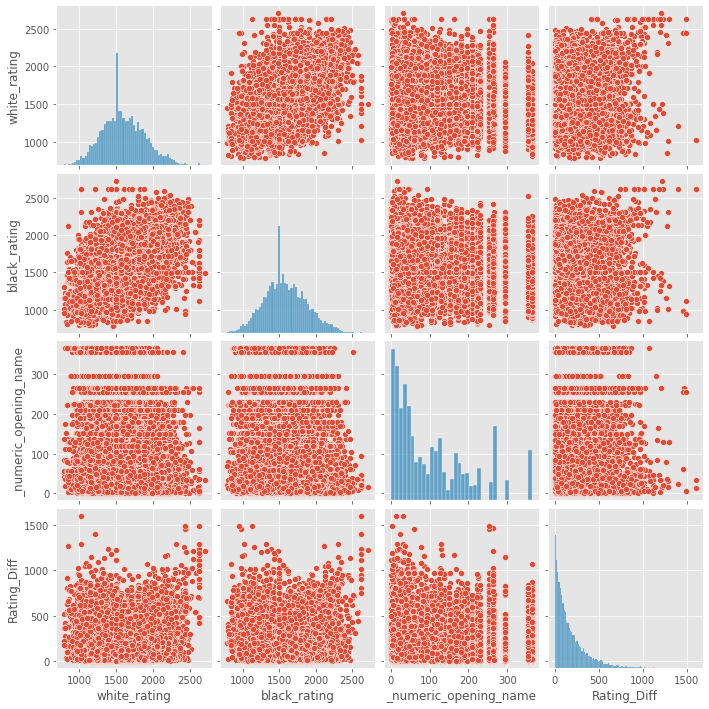

In [199]:
sns.pairplot(Final_dataForML)
plt.show()

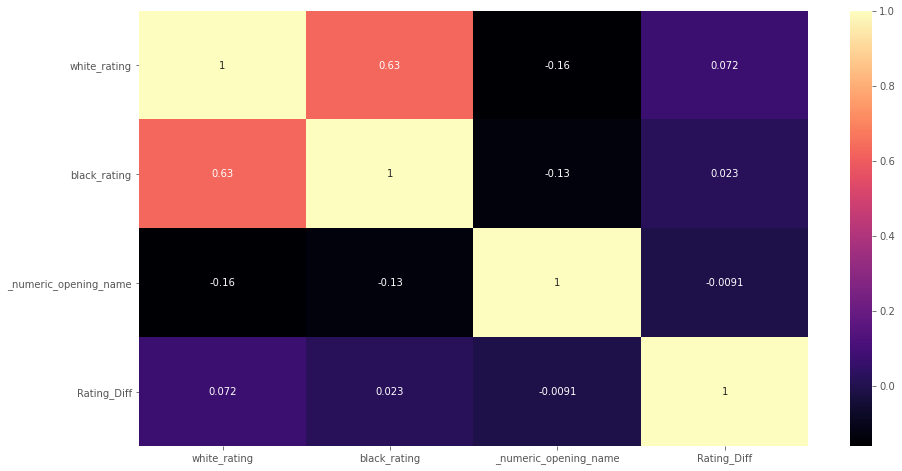

In [200]:
plt.figure(figsize=(15,8))
sns.heatmap(Final_dataForML.corr() , annot=True , cmap = "magma" )
plt.show()

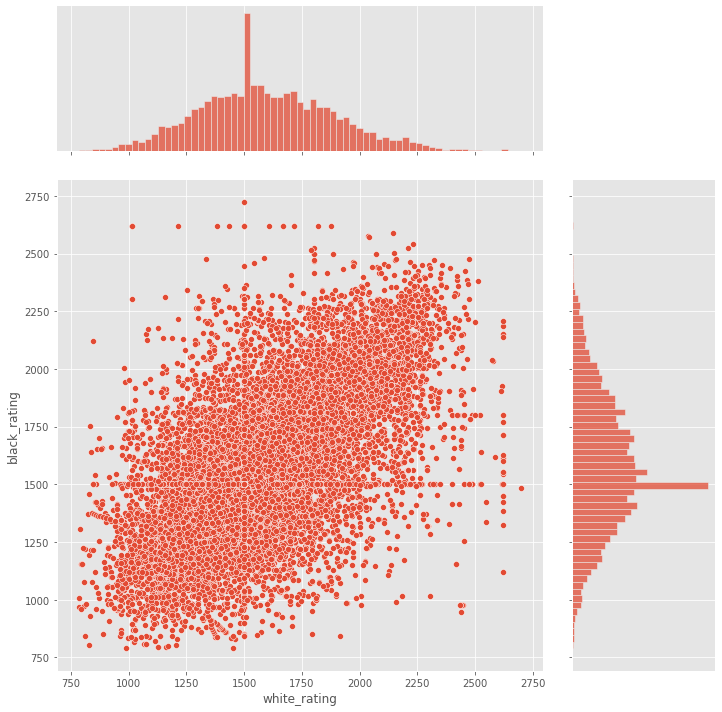

In [201]:

sns.jointplot(data=Final_dataForML , x='white_rating' , y = 'black_rating' , ratio=3 , height=10)
plt.show()

we can see that balack_rating and white_rating are somewhat correlated because games are unbiased .<br>


In [202]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [204]:
CategoricalVariables=['_numeric_opening_name']
                     

# Calling the function
FunctionChisq(inpData=Final_dataForML, 
              TargetVariable='winner',
              CategoricalVariablesList= CategoricalVariables)

_numeric_opening_name is correlated with winner | P-Value: 1.6204545571881764e-25


['_numeric_opening_name']

In [206]:
# Assigning x and y variables for model building

y = Final_dataForML['winner'].values
X = Final_dataForML.drop('winner',1).values

In [208]:
X

array([[1500, 1191,   28,  309],
       [1322, 1261,   67,   61],
       [1496, 1500,  152,    4],
       ...,
       [1219, 1286,  230,   67],
       [1360, 1227,   19,  133],
       [1235, 1339,  230,  104]], dtype=int64)

## Building Model

In [209]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.pipeline import Pipeline, make_pipeline

# Tuning
from sklearn.model_selection import GridSearchCV


# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True , stratify=y)

print("The Shape of X_train:", X_train.shape)
print("The Shape of X_test:", X_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)
print("\n\n---------------------------------------------------------------------------------\n\n")

models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('GaussianNB'   , GaussianNB()))
models.append(('SVM'  , SVC(random_state=0 ,probability=True)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
models.append(('XGBClassifier', XGBClassifier(random_state=0)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0)))


model_name = []
accuracy = []

for name, model in models: 
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print(name, metrics.accuracy_score(y_test,y_pred))
    
Accuracy_df = pd.DataFrame({"Model" : model_name , "Accuracy" : accuracy})
Accuracy_df

The Shape of X_train: (13151, 4)
The Shape of X_test: (6478, 4)
The Shape of y_train: (13151,)
The Shape of y_test: (6478,)


---------------------------------------------------------------------------------


LogisticRegression 0.6305958629206545
GaussianNB 0.6096017289286817
SVM 0.6179376350725533
DecisionTreeClassifier 0.5464649583204693
[20:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.614541525162087
GradientBoostingClassifier 0.6312133374498302
KNeighborsClassifier 0.5818153751157765
RandomForestClassifier 0.6122259956776783


,Model,Accuracy
0,LogisticRegression,0.630596
1,GaussianNB,0.609602
2,SVM,0.617938
3,DecisionTreeClassifier,0.546465
4,XGBClassifier,0.614542
5,GradientBoostingClassifier,0.631213
6,KNeighborsClassifier,0.581815
7,RandomForestClassifier,0.612226


                        Model  Accuracy
3      DecisionTreeClassifier  0.546465
6        KNeighborsClassifier  0.581815
1                  GaussianNB  0.609602
7      RandomForestClassifier  0.612226
4               XGBClassifier  0.614542
2                         SVM  0.617938
0          LogisticRegression  0.630596
5  GradientBoostingClassifier  0.631213


<BarContainer object of 8 artists>

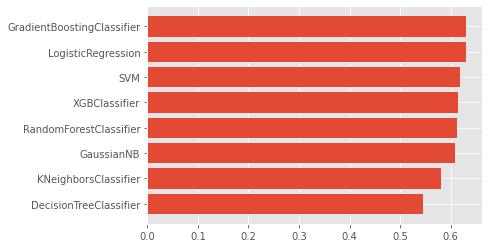

In [210]:
Temp = Accuracy_df.sort_values("Accuracy")
print(Temp)
plt.barh( Temp["Model"],Temp["Accuracy"] )

In [211]:

def NormalizedModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler == 'normalizer':
        scaler = Normalizer()
    elif nameOfScaler == 'binarizer':
        scaler = Binarizer()

    pipelines = []
    pipelines.append((nameOfScaler+'_LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'_KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'_DT'  , Pipeline([('Scaler', scaler),('DT'  , DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'_NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'_SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'_GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'_RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))

    return pipelines

# Train model
def fit_model(X_train, y_train, X_test , y_test ,models):
    
    num_folds = 10
    scoring = 'accuracy'

    accuracy = []
    names = []
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        names.append(name)
        accuracy.append(metrics.accuracy_score(y_test,y_pred))

    df = pd.DataFrame({"Model" : names , "Accuracy" :accuracy })
    print(df)
    return df


In [212]:
ScaledModel = NormalizedModel('standard')
df = fit_model(X_train, y_train, X_test , y_test, ScaledModel)


          Model  Accuracy
0   standard_LR  0.630441
1  standard_KNN  0.575486
2   standard_DT  0.546774
3   standard_NB  0.609602
4  standard_SVM  0.632140
5  standard_GBM  0.631059
6   standard_RF  0.615931


In [213]:
df

,Model,Accuracy
0,standard_LR,0.630441
1,standard_KNN,0.575486
2,standard_DT,0.546774
3,standard_NB,0.609602
4,standard_SVM,0.632140
5,standard_GBM,0.631059
6,standard_RF,0.615931


<BarContainer object of 7 artists>

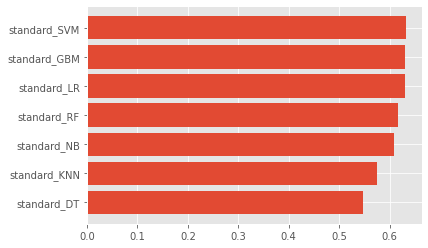

In [214]:
Temp = df.sort_values("Accuracy")
plt.barh( Temp["Model"],Temp["Accuracy"] )

In [215]:
ScaledModel = NormalizedModel('minmax')
df = fit_model(X_train, y_train, X_test , y_test, ScaledModel)

        Model  Accuracy
0   minmax_LR  0.630596
1  minmax_KNN  0.574560
2   minmax_DT  0.548472
3   minmax_NB  0.609602
4  minmax_SVM  0.624730
5  minmax_GBM  0.631213
6   minmax_RF  0.615622


<BarContainer object of 7 artists>

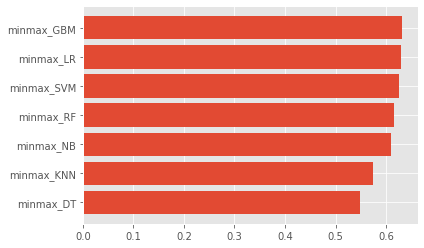

In [216]:
Temp = df.sort_values("Accuracy")
plt.barh( Temp["Model"],Temp["Accuracy"] )

In [217]:
ScaledModel = NormalizedModel('normalizer')
df = fit_model(X_train, y_train, X_test , y_test, ScaledModel)

            Model  Accuracy
0   normalizer_LR  0.630133
1  normalizer_KNN  0.582124
2   normalizer_DT  0.547082
3   normalizer_NB  0.627972
4  normalizer_SVM  0.617320
5  normalizer_GBM  0.626274
6   normalizer_RF  0.593393


### Top models are :

*  minmax_GBM :  0.631213

* minmax_LR  0.630596

*  standard_SVM	0.632140

*    GradientBoostingClassifier  0.631213

## Check accuracy with cross validation

In [218]:
# Metrics
from sklearn.metrics import classification_report

finalmodels = []
# pipelines.append((nameOfScaler+'_LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))


finalmodels.append(('Std_GBM' , Pipeline([('Scaler' ,StandardScaler()), ('GBM', GradientBoostingClassifier())])))
finalmodels.append(('minmax_SVM' , Pipeline([('Scaler' ,MinMaxScaler()), ('SVM', SVC())])))
finalmodels.append(('minmax_LR' , Pipeline([('Scaler' ,MinMaxScaler()), ('LR', LogisticRegression())])))
finalmodels.append(('GBM' , Pipeline([('LR', GradientBoostingClassifier())])))




In [219]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracy = []
names = []
for name , model in finalmodels:
    
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    names.append(name)
    accuracy.append(cv_results.mean())

    df = pd.DataFrame({"Model" : names , "Accuracy" :accuracy })
print(df)
#     print(cv_results.mean())


        Model  Accuracy
0     Std_GBM  0.618931
1  minmax_SVM  0.618727
2   minmax_LR  0.620510
3         GBM  0.619185


In [220]:
# Metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

pipeline = make_pipeline(MinMaxScaler(),  LogisticRegression())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    
print(classification_report(y_test, y_pred))

Training Accuracy Score: 61.5%
Validation Accuracy Score: 63.1%
              precision    recall  f1-score   support

       black       0.62      0.62      0.62      2943
        draw       0.00      0.00      0.00       303
       white       0.64      0.70      0.67      3232

    accuracy                           0.63      6478
   macro avg       0.42      0.44      0.43      6478
weighted avg       0.60      0.63      0.61      6478



In [221]:
from sklearn.metrics import accuracy_score        
accuracy_score(y_test, y_pred)

0.6305958629206545

## Sample Data Prediction

In [222]:
dataForML.tail()

,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner,_numeric_opening_name
20053,1691,1220,A80,Dutch Defense,471,white,46
20054,1233,1196,A41,Queen's Pawn,37,black,129
20055,1219,1286,D00,Queen's Pawn Game: Mason Attack,67,white,230
20056,1360,1227,B07,Pirc Defense,133,white,19
20057,1235,1339,D00,Queen's Pawn Game: Mason Attack,104,black,230


In [226]:
white_rating = 1698
black_rating = 1220

opening = opening_name_freqmap['Dutch Defense']



sample = [white_rating , black_rating ,opening ,abs(white_rating - black_rating)  ]
single_sample = np.array(sample).reshape(1,-1)
pred = model.predict(single_sample)
print(pred.item())
# print(lr.predict(test))
print(max(model.predict_proba(single_sample)[0]))
print((model.predict_proba(single_sample)[0]))

white
0.8459601403205842
[0.12388651 0.03015335 0.84596014]


In [230]:
white_rating = 1235
black_rating = 1340
opening = opening_name_freqmap["Queen's Pawn Game: Mason Attack"]



sample = [white_rating , black_rating ,opening, abs(white_rating - black_rating) ]
single_sample = np.array(sample).reshape(1,-1)
pred = model.predict(single_sample)
print(pred.item())
# print(lr.predict(test))
print(max(model.predict_proba(single_sample)[0]))
print((model.predict_proba(single_sample)[0]))

black
0.557565016221272
[0.55756502 0.03597001 0.40646497]


## Retraining model with 100% data

In [231]:
# Training the model on 100% Data available
Final_MinmaxLogisticReg_Model=model.fit(X,y)

## Saving Model as Serilized File

In [232]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_MinmaxLogisticReg_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_MinmaxLogisticReg_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\ASUS\Desktop\playground\Python\DS Handbook\CS\Chess


## Create Python Function

In [247]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    import pickle
    
    with open('opening_name_freqmap.pkl', 'rb') as fileReadStream:
        opening_name_freqmap=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
    
    
    InputData['opening_name'] = InputData['opening_name'].map(opening_name_freqmap)
    InputData['Rating_Diff'] = abs(InputData['white_rating'] - InputData['black_rating'])
    Num_Inputs=InputData.shape[0]
    
    
    # Appending the new data with the Training data
#     dataForML=pd.read_pickle('dataForML.pkl')
#     InputData=InputData.append(dataForML)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=["white_rating" , "black_rating" ,"opening_name" , "Rating_Diff"]
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    
    
    with open('Final_MinmaxLogisticReg_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genprice Predictions
    Prediction=PredictionModel.predict(X)
    maxProb = PredictionModel.predict_proba(X).max(axis = 1)
    PredictionResult=pd.DataFrame({ 'Prediction' : Prediction,
                                    'Prob' :maxProb.round(3)
                                   ,'Black-Draw_White' : PredictionModel.predict_proba(X).round(3).reshape(Num_Inputs,3).tolist() 
                                  })
    return(PredictionResult)

In [248]:
dataForML[10:18]

,white_rating,black_rating,opening_eco,opening_name,Rating_Diff,winner,_numeric_opening_name
10,1381,1272,A00,Van't Kruijs Opening,109,white,363
11,1381,1867,C02,French Defense: Advance Variation,486,black,168
12,1381,1936,C00,French Defense: Knight Variation,555,black,265
13,1381,1607,C00,French Defense #2,226,black,105
14,1094,1141,C50,Four Knights Game: Italian Variation,47,white,168
15,1141,1094,C57,Italian Game: Two Knights Defense,47,black,263
16,1094,1141,C50,Four Knights Game: Italian Variation,47,black,168
17,1141,1094,C50,Four Knights Game: Italian Variation,47,black,168


In [249]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[1382 , 1272 , "Van't Kruijs Opening"],
     [ 1141 , 1100 , "Italian Game: Two Knights Defense"] ,
     [ 1094 , 1140 , "Four Knights Game: Italian Variation"],
     [ 1000 , 2000 , "French Defense #2"]],
    
columns=["white_rating" , "black_rating" ,"opening_name" ])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   white_rating  black_rating                          opening_name
0          1382          1272                  Van't Kruijs Opening
1          1141          1100     Italian Game: Two Knights Defense
2          1094          1140  Four Knights Game: Italian Variation
3          1000          2000                     French Defense #2


,Prediction,Prob,Black-Draw_White
0,white,0.588,"[0.374, 0.038, 0.588]"
1,white,0.540,"[0.426, 0.034, 0.54]"
2,black,0.498,"[0.498, 0.034, 0.468]"
3,black,0.961,"[0.961, 0.011, 0.028]"


In [250]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[2030 , 2020 , "Van't Kruijs Opening"]],
    
columns=["white_rating" , "black_rating" ,"opening_name" ])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   white_rating  black_rating          opening_name
0          2030          2020  Van't Kruijs Opening


,Prediction,Prob,Black-Draw_White
0,black,0.473,"[0.473, 0.065, 0.462]"
